<a href="https://colab.research.google.com/github/abrarrn/Data-Structures-Algorithms/blob/main/ANN_on_Pima.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We are going to apply **Artificial Neural Network (ANN)** on Pima Indians Diabetes Dataset

*Dataset link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database*

In [2]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim

Uploading![nn.svg](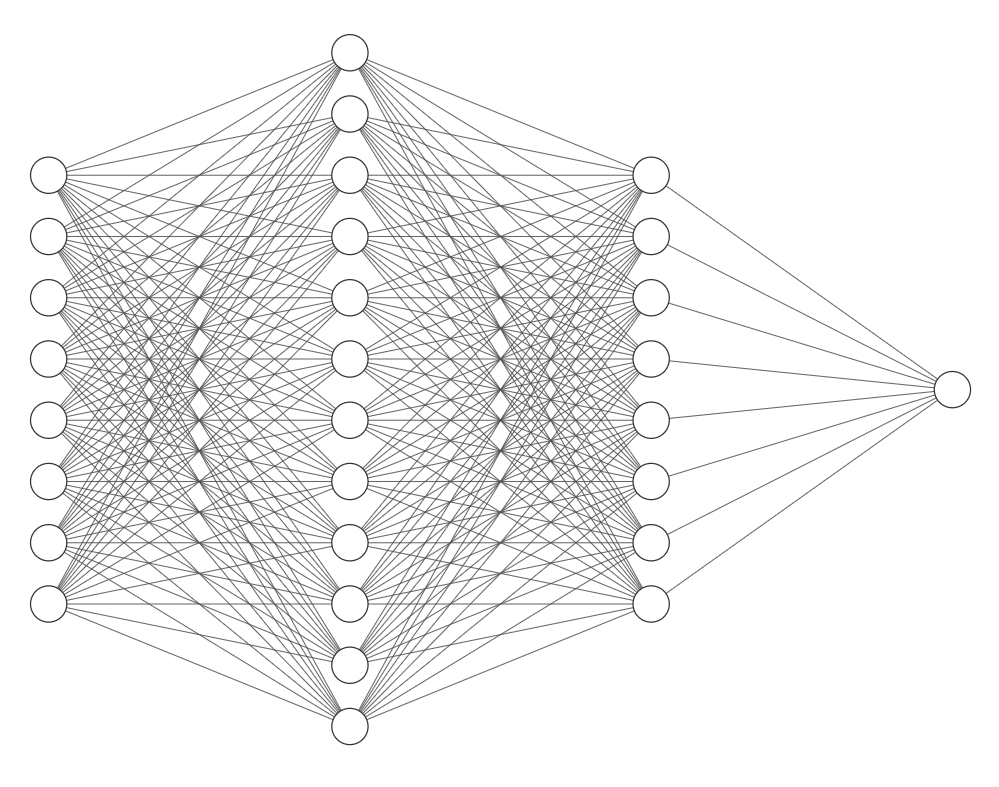) the dataset in Colab from PC

In [3]:
df = pd.read_csv('/content/PIMA Indians Dataset.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**X** will hold the features / attributes

**y** will hold the outputs

In [29]:
X = df.iloc[:,0:8]
y = df.iloc[:,8]

In [14]:
X.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
dtype: object

Need to convert the data: from int64, float64 -> tensor(32 bit)

In [30]:
X = torch.tensor(X.values, dtype=torch.float32)
y = torch.tensor(y.values, dtype=torch.float32).reshape(-1, 1)

In [31]:
# nn.Module class is from the PyTorch library and is commonly used as a base class for all neural network modules in PyTorch
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()  #inheriting the properties of nn.Module
        self.hidden1 = nn.Linear(8, 12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12, 8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8, 1)
        self.act_output = nn.Sigmoid()

    def forward(self, x): #forward pass (x is the batch-ed input)
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x

model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [ ]:
from PIL import Image
im = Image.open('/content/simple_ann.PNG')
im

In [32]:
loss_fn = nn.BCELoss()  # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [34]:
n_epochs = 100
batch_size = 10

for epoch in range(n_epochs):
    for i in range(0, len(X), batch_size):
        Xbatch = X[i : i+batch_size]
        ybatch = y[i : i+batch_size]
        y_pred = model(Xbatch)          #forward pass
        loss = loss_fn(y_pred, ybatch)  #computing loss
        loss.backward()                 #backpropagation
        optimizer.step()                #update parameters
        optimizer.zero_grad()           #the gradients are cleared before the next backward pass
    print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 0, latest loss 0.39883074164390564
Finished epoch 1, latest loss 0.39490005373954773
Finished epoch 2, latest loss 0.3969610631465912
Finished epoch 3, latest loss 0.3990507423877716
Finished epoch 4, latest loss 0.3972112834453583
Finished epoch 5, latest loss 0.39209628105163574
Finished epoch 6, latest loss 0.3955265283584595
Finished epoch 7, latest loss 0.39875105023384094
Finished epoch 8, latest loss 0.3924541175365448
Finished epoch 9, latest loss 0.39529842138290405
Finished epoch 10, latest loss 0.40074965357780457
Finished epoch 11, latest loss 0.3916660249233246
Finished epoch 12, latest loss 0.39386558532714844
Finished epoch 13, latest loss 0.39834412932395935
Finished epoch 14, latest loss 0.39443832635879517
Finished epoch 15, latest loss 0.3903849720954895
Finished epoch 16, latest loss 0.3939459025859833
Finished epoch 17, latest loss 0.39297837018966675
Finished epoch 18, latest loss 0.39312514662742615
Finished epoch 19, latest loss 0.3931505382061004

In [35]:
# compute accuracy (no_grad is optional)
with torch.no_grad():
    y_pred = model(X)
accuracy = (y_pred.round() == y).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7890625
